# **Libraries**
---

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm as tq
import gzip, pickle
from sklearn.model_selection import train_test_split



# **Load files**  ▓▓▓▓▓▓▓▓░░░░░░░░░░░░  100%
---


  colab

local machine

# **25M data file**

In [2]:
# df_25M = pd.read_csv("ratings.csv").drop(columns='timestamp').to_numpy()
# movies_df_25M = pd.read_csv("movies.csv").to_numpy()

In [3]:
# movies_df_25M

# **100K Df**

In [4]:
#100k data file
path = "/home/oepeng/Documents/Python/my jupter/100k_csv/"
ratings_df = pd.read_csv( path + "ratings.csv").drop(columns='timestamp').to_numpy()
movies_df = pd.read_csv( path + "movies.csv").to_numpy()

dummy_user = {
    'userId' : 999, #my phone no.
    'movieId': 2640,  # superman
    'rating': 5 
}


In [5]:
from datastructures import Sparser 
sparse = Sparser(ratings_df, movies_df)

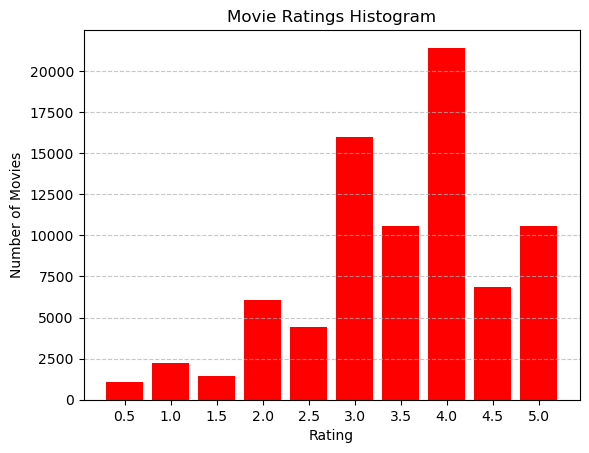

In [6]:
sparse.plot_ratings()

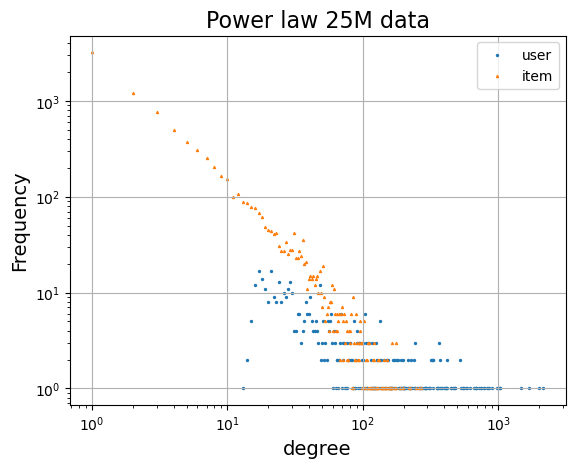

In [7]:
sparse.plot_scatter()


In [8]:
movie_to_system_mov_title_dict = sparse.movie_to_system_mov_title_dict

In [9]:
train_test_data = sparse.data_by_user_train, sparse.data_by_movie_train, sparse.data_by_user_test

In [10]:
user = sparse.system_user_to_user_dict[186]
user

380

In [11]:
features_data = sparse.movie_to_system_mov_title_dict, sparse.item_to_features, sparse.features_to_item 


In [12]:
 #pickle and load
sparse_data = {'features_data':features_data , 'train_test_data': train_test_data}

with open( "25M_data_normal.pkl", "wb") as f:
    pickle.dump(sparse_data , f)



In [13]:
# load
with open("25M_data_normal.pkl", "rb") as f:
    loaded_sparse_data = pickle.load(f)


In [14]:
features_data = loaded_sparse_data["features_data"]
train_test_data = loaded_sparse_data["train_test_data"]
movie_to_system_mov_title_dict = features_data[0]

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:00<00:17,  1.07it/s]

epoch: 1   rmse train: 0.8604168761208021  | rmse test: 0.9101158739686304


 10%|█         | 2/20 [00:01<00:16,  1.07it/s]

epoch: 2   rmse train: 0.8199155347925137  | rmse test: 0.9084172966421402


 15%|█▌        | 3/20 [00:02<00:15,  1.07it/s]

epoch: 3   rmse train: 0.7679650280602389  | rmse test: 0.9210570159828622


 20%|██        | 4/20 [00:03<00:14,  1.07it/s]

epoch: 4   rmse train: 0.75379407626417  | rmse test: 0.9275360068701011


 25%|██▌       | 5/20 [00:04<00:13,  1.07it/s]

epoch: 5   rmse train: 0.7482446973109929  | rmse test: 0.9309106561361048


 30%|███       | 6/20 [00:05<00:13,  1.07it/s]

epoch: 6   rmse train: 0.7460550777036262  | rmse test: 0.9329792377417274


 35%|███▌      | 7/20 [00:06<00:12,  1.07it/s]

epoch: 7   rmse train: 0.7452492745423136  | rmse test: 0.9343305866955912


 40%|████      | 8/20 [00:07<00:11,  1.07it/s]

epoch: 8   rmse train: 0.7450002092314575  | rmse test: 0.9352069022208566


 45%|████▌     | 9/20 [00:08<00:10,  1.07it/s]

epoch: 9   rmse train: 0.7449567444240074  | rmse test: 0.9357612982134795


 50%|█████     | 10/20 [00:09<00:09,  1.07it/s]

epoch: 10   rmse train: 0.7449690895585751  | rmse test: 0.9361020481139851


 55%|█████▌    | 11/20 [00:10<00:08,  1.07it/s]

epoch: 11   rmse train: 0.7449766616784188  | rmse test: 0.9363049591321382


 60%|██████    | 12/20 [00:11<00:07,  1.07it/s]

epoch: 12   rmse train: 0.7449597109026571  | rmse test: 0.9364217097858644


 65%|██████▌   | 13/20 [00:12<00:06,  1.07it/s]

epoch: 13   rmse train: 0.7449170337896427  | rmse test: 0.936486651291604


 70%|███████   | 14/20 [00:13<00:05,  1.06it/s]

epoch: 14   rmse train: 0.7448548614387411  | rmse test: 0.9365219418996044


 75%|███████▌  | 15/20 [00:14<00:04,  1.06it/s]

epoch: 15   rmse train: 0.7447811285896593  | rmse test: 0.9365412724583643


 80%|████████  | 16/20 [00:14<00:03,  1.06it/s]

epoch: 16   rmse train: 0.7447027249319282  | rmse test: 0.9365526168929971


 85%|████████▌ | 17/20 [00:15<00:02,  1.06it/s]

epoch: 17   rmse train: 0.7446245286162576  | rmse test: 0.9365602854664847


 90%|█████████ | 18/20 [00:16<00:01,  1.06it/s]

epoch: 18   rmse train: 0.7445494461269123  | rmse test: 0.9365663875835096


 95%|█████████▌| 19/20 [00:17<00:00,  1.06it/s]

epoch: 19   rmse train: 0.7444788937103328  | rmse test: 0.9365717773786264


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]

epoch: 20   rmse train: 0.7444133533039747  | rmse test: 0.9365766033190724


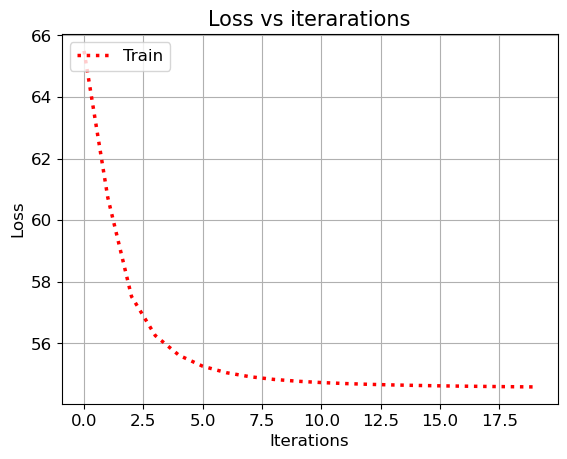

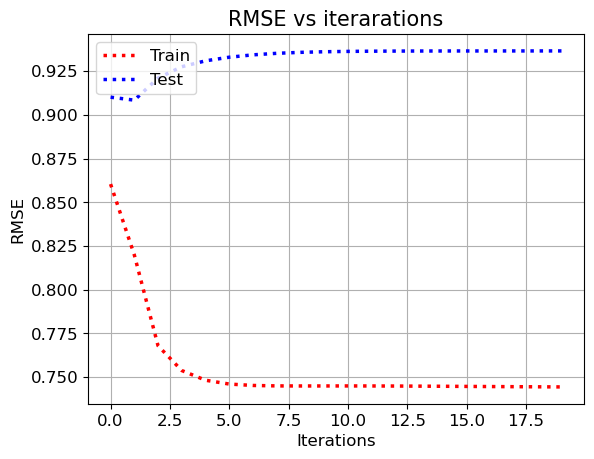

In [15]:
from model import Trainor
trainor = Trainor(data = train_test_data, latent_d=6, gamma=0.01)
trainor.train() 

In [18]:
trainor.train(showplt=False) 

  5%|▌         | 1/20 [00:00<00:17,  1.07it/s]

epoch: 1   rmse train: 0.7443528228326266  | rmse test: 0.9365806124358463


 10%|█         | 2/20 [00:01<00:16,  1.06it/s]

epoch: 2   rmse train: 0.7442971122170353  | rmse test: 0.9365833368803275


 15%|█▌        | 3/20 [00:02<00:16,  1.06it/s]

epoch: 3   rmse train: 0.7442460025032515  | rmse test: 0.9365842377757405


 20%|██        | 4/20 [00:03<00:15,  1.06it/s]

epoch: 4   rmse train: 0.744199306757177  | rmse test: 0.9365828305249283


 25%|██▌       | 5/20 [00:04<00:14,  1.06it/s]

epoch: 5   rmse train: 0.7441568715474831  | rmse test: 0.9365787845041905


 30%|███       | 6/20 [00:05<00:13,  1.06it/s]

epoch: 6   rmse train: 0.7441185509095103  | rmse test: 0.9365719812786277


 35%|███▌      | 7/20 [00:06<00:12,  1.05it/s]

epoch: 7   rmse train: 0.7440841757586921  | rmse test: 0.936562522882613


 40%|████      | 8/20 [00:07<00:11,  1.06it/s]

epoch: 8   rmse train: 0.7440535322819436  | rmse test: 0.9365506953773072


 45%|████▌     | 9/20 [00:08<00:10,  1.06it/s]

epoch: 9   rmse train: 0.7440263541743558  | rmse test: 0.9365369038613267


 50%|█████     | 10/20 [00:09<00:09,  1.06it/s]

epoch: 10   rmse train: 0.744002327278755  | rmse test: 0.9365215987424905


 55%|█████▌    | 11/20 [00:10<00:08,  1.06it/s]

epoch: 11   rmse train: 0.7439811020752329  | rmse test: 0.9365052097433345


 60%|██████    | 12/20 [00:11<00:07,  1.05it/s]

epoch: 12   rmse train: 0.7439623091441456  | rmse test: 0.9364880971826247


 65%|██████▌   | 13/20 [00:12<00:06,  1.06it/s]

epoch: 13   rmse train: 0.743945573984039  | rmse test: 0.9364705231565715


 70%|███████   | 14/20 [00:13<00:05,  1.06it/s]

epoch: 14   rmse train: 0.7439305292222751  | rmse test: 0.9364526404561141


 75%|███████▌  | 15/20 [00:14<00:04,  1.07it/s]

epoch: 15   rmse train: 0.7439168236080271  | rmse test: 0.9364344948243286


 80%|████████  | 16/20 [00:15<00:03,  1.07it/s]

epoch: 16   rmse train: 0.7439041280099167  | rmse test: 0.9364160358771051


 85%|████████▌ | 17/20 [00:16<00:02,  1.07it/s]

epoch: 17   rmse train: 0.7438921390216531  | rmse test: 0.9363971327970024


 90%|█████████ | 18/20 [00:16<00:01,  1.07it/s]

epoch: 18   rmse train: 0.7438805808658046  | rmse test: 0.9363775920474033


 95%|█████████▌| 19/20 [00:17<00:00,  1.08it/s]

epoch: 19   rmse train: 0.7438692062213891  | rmse test: 0.9363571754158938


100%|██████████| 20/20 [00:18<00:00,  1.06it/s]

epoch: 20   rmse train: 0.743857796479485  | rmse test: 0.9363356175058768


Training with latent_d = 1


 10%|█         | 1/10 [00:00<00:08,  1.06it/s]

epoch: 1   rmse train: 0.8079773711261846  | rmse test: 0.8810727334578133


 20%|██        | 2/10 [00:01<00:07,  1.07it/s]

epoch: 2   rmse train: 0.7874705431791925  | rmse test: 0.8672760541062938


 30%|███       | 3/10 [00:02<00:06,  1.07it/s]

epoch: 3   rmse train: 0.7712212994060609  | rmse test: 0.8776165461275832


 40%|████      | 4/10 [00:03<00:05,  1.07it/s]

epoch: 4   rmse train: 0.7633845686129881  | rmse test: 0.8909647062520895


 50%|█████     | 5/10 [00:04<00:04,  1.07it/s]

epoch: 5   rmse train: 0.7602791075043929  | rmse test: 0.8967417195592666


 60%|██████    | 6/10 [00:05<00:03,  1.07it/s]

epoch: 6   rmse train: 0.7587774080125593  | rmse test: 0.8998133293068976


 70%|███████   | 7/10 [00:06<00:02,  1.07it/s]

epoch: 7   rmse train: 0.7580188233754919  | rmse test: 0.9016733696264486


 80%|████████  | 8/10 [00:07<00:01,  1.07it/s]

epoch: 8   rmse train: 0.7576313590898518  | rmse test: 0.902928723868816


 90%|█████████ | 9/10 [00:08<00:00,  1.07it/s]

epoch: 9   rmse train: 0.757438868073213  | rmse test: 0.9038199339639044


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


epoch: 10   rmse train: 0.7573531010368204  | rmse test: 0.9044586213405329
Training with latent_d = 2


 10%|█         | 1/10 [00:00<00:07,  1.15it/s]

epoch: 1   rmse train: 0.8059253803613982  | rmse test: 0.8805713634027845


 20%|██        | 2/10 [00:01<00:07,  1.13it/s]

epoch: 2   rmse train: 0.7805348325043112  | rmse test: 0.8684102483958881


 30%|███       | 3/10 [00:02<00:06,  1.12it/s]

epoch: 3   rmse train: 0.7561981203988776  | rmse test: 0.8811520545775318


 40%|████      | 4/10 [00:03<00:05,  1.11it/s]

epoch: 4   rmse train: 0.7452002505753571  | rmse test: 0.8915303127482199


 50%|█████     | 5/10 [00:04<00:04,  1.12it/s]

epoch: 5   rmse train: 0.7404858133366772  | rmse test: 0.8959312003646434


 60%|██████    | 6/10 [00:05<00:03,  1.12it/s]

epoch: 6   rmse train: 0.7382126779903637  | rmse test: 0.8978593752448004


 70%|███████   | 7/10 [00:06<00:02,  1.13it/s]

epoch: 7   rmse train: 0.7370725094643044  | rmse test: 0.8987641554043412


 80%|████████  | 8/10 [00:07<00:01,  1.12it/s]

epoch: 8   rmse train: 0.7364577574298575  | rmse test: 0.8992289781796162


 90%|█████████ | 9/10 [00:08<00:00,  1.13it/s]

epoch: 9   rmse train: 0.7360847570333466  | rmse test: 0.8994853586513094


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


epoch: 10   rmse train: 0.735813269962698  | rmse test: 0.8996362985305127
Training with latent_d = 3


 10%|█         | 1/10 [00:00<00:08,  1.10it/s]

epoch: 1   rmse train: 0.8027692199296922  | rmse test: 0.880351425450146


 20%|██        | 2/10 [00:01<00:07,  1.10it/s]

epoch: 2   rmse train: 0.771881831347474  | rmse test: 0.8678637141375312


 30%|███       | 3/10 [00:02<00:06,  1.10it/s]

epoch: 3   rmse train: 0.7389932988612108  | rmse test: 0.8750987460726756


 40%|████      | 4/10 [00:03<00:05,  1.10it/s]

epoch: 4   rmse train: 0.7268481683949809  | rmse test: 0.8791329749593607


 50%|█████     | 5/10 [00:04<00:04,  1.10it/s]

epoch: 5   rmse train: 0.721659499610058  | rmse test: 0.8815417945634015


 60%|██████    | 6/10 [00:05<00:03,  1.10it/s]

epoch: 6   rmse train: 0.7192084435810816  | rmse test: 0.8829897088663728


 70%|███████   | 7/10 [00:06<00:02,  1.10it/s]

epoch: 7   rmse train: 0.7179653387309193  | rmse test: 0.8837489525827777


 80%|████████  | 8/10 [00:07<00:01,  1.10it/s]

epoch: 8   rmse train: 0.7172602777559173  | rmse test: 0.8840871482595779


 90%|█████████ | 9/10 [00:08<00:00,  1.10it/s]

epoch: 9   rmse train: 0.7167937993275448  | rmse test: 0.8842084055653465


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


epoch: 10   rmse train: 0.7164337382011126  | rmse test: 0.8842442313617582
Training with latent_d = 4


 10%|█         | 1/10 [00:00<00:08,  1.09it/s]

epoch: 1   rmse train: 0.8013542126042824  | rmse test: 0.8806232841870266


 20%|██        | 2/10 [00:01<00:07,  1.09it/s]

epoch: 2   rmse train: 0.7647116575529674  | rmse test: 0.8682746742393667


 30%|███       | 3/10 [00:02<00:06,  1.10it/s]

epoch: 3   rmse train: 0.7283719519332726  | rmse test: 0.8766931601861774


 40%|████      | 4/10 [00:03<00:05,  1.09it/s]

epoch: 4   rmse train: 0.7152104764879296  | rmse test: 0.882528563190219


 50%|█████     | 5/10 [00:04<00:04,  1.09it/s]

epoch: 5   rmse train: 0.7093711495736634  | rmse test: 0.8855780936269034


 60%|██████    | 6/10 [00:05<00:03,  1.08it/s]

epoch: 6   rmse train: 0.706063310413176  | rmse test: 0.8869707883914761


 70%|███████   | 7/10 [00:06<00:02,  1.08it/s]

epoch: 7   rmse train: 0.7038662233265147  | rmse test: 0.887409226736787


 80%|████████  | 8/10 [00:07<00:01,  1.09it/s]

epoch: 8   rmse train: 0.7023277330337016  | rmse test: 0.8873657836520074


 90%|█████████ | 9/10 [00:08<00:00,  1.09it/s]

epoch: 9   rmse train: 0.7012203031653494  | rmse test: 0.8871496068959757


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


epoch: 10   rmse train: 0.7004073570445163  | rmse test: 0.8869209872989879
Training with latent_d = 5


 10%|█         | 1/10 [00:00<00:08,  1.06it/s]

epoch: 1   rmse train: 0.7992070914219491  | rmse test: 0.8804971740669024


 20%|██        | 2/10 [00:01<00:07,  1.07it/s]

epoch: 2   rmse train: 0.7606399282904138  | rmse test: 0.8675854804153121


 30%|███       | 3/10 [00:02<00:06,  1.06it/s]

epoch: 3   rmse train: 0.7180075450716757  | rmse test: 0.8773203336026776


 40%|████      | 4/10 [00:03<00:05,  1.07it/s]

epoch: 4   rmse train: 0.7038619625830794  | rmse test: 0.8816407491044318


 50%|█████     | 5/10 [00:04<00:04,  1.07it/s]

epoch: 5   rmse train: 0.6975341262888827  | rmse test: 0.8827651314408878


 60%|██████    | 6/10 [00:05<00:03,  1.08it/s]

epoch: 6   rmse train: 0.6938990121059375  | rmse test: 0.8826708357935111


 70%|███████   | 7/10 [00:06<00:02,  1.08it/s]

epoch: 7   rmse train: 0.6915197420554626  | rmse test: 0.8821355355683679


 80%|████████  | 8/10 [00:07<00:01,  1.08it/s]

epoch: 8   rmse train: 0.6898763554034593  | rmse test: 0.8815247127508392


 90%|█████████ | 9/10 [00:08<00:00,  1.05it/s]

epoch: 9   rmse train: 0.6887255621776079  | rmse test: 0.8810006500799008


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


epoch: 10   rmse train: 0.6879172085570646  | rmse test: 0.8806185137861969
Training with latent_d = 6


 10%|█         | 1/10 [00:00<00:08,  1.05it/s]

epoch: 1   rmse train: 0.7973841737660222  | rmse test: 0.8795186216001413


 20%|██        | 2/10 [00:01<00:07,  1.01it/s]

epoch: 2   rmse train: 0.7506808780334232  | rmse test: 0.8660912219501924


 30%|███       | 3/10 [00:02<00:06,  1.04it/s]

epoch: 3   rmse train: 0.705149073991428  | rmse test: 0.871504612435469


 40%|████      | 4/10 [00:03<00:05,  1.05it/s]

epoch: 4   rmse train: 0.6896576798065489  | rmse test: 0.8756830941229605


 50%|█████     | 5/10 [00:04<00:04,  1.05it/s]

epoch: 5   rmse train: 0.6837415752683287  | rmse test: 0.8777707921756402


 60%|██████    | 6/10 [00:05<00:03,  1.05it/s]

epoch: 6   rmse train: 0.68078540919621  | rmse test: 0.8788715406272387


 70%|███████   | 7/10 [00:06<00:02,  1.05it/s]

epoch: 7   rmse train: 0.6790118090495687  | rmse test: 0.8793729776958129


 80%|████████  | 8/10 [00:07<00:01,  1.06it/s]

epoch: 8   rmse train: 0.6778014553977364  | rmse test: 0.8795114926192557


 90%|█████████ | 9/10 [00:08<00:00,  1.06it/s]

epoch: 9   rmse train: 0.6768987660404937  | rmse test: 0.8794550740387155


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


epoch: 10   rmse train: 0.6761837957001586  | rmse test: 0.8793061895140749
Training with latent_d = 7


 10%|█         | 1/10 [00:00<00:08,  1.06it/s]

epoch: 1   rmse train: 0.7957704360557808  | rmse test: 0.8807320325795623


 20%|██        | 2/10 [00:02<00:12,  1.50s/it]

epoch: 2   rmse train: 0.7429519896092138  | rmse test: 0.8675933780152221


 30%|███       | 3/10 [00:03<00:09,  1.32s/it]

epoch: 3   rmse train: 0.6959321675762615  | rmse test: 0.8749800681629857


 40%|████      | 4/10 [00:05<00:07,  1.28s/it]

epoch: 4   rmse train: 0.6808553044079722  | rmse test: 0.878496953618315


 50%|█████     | 5/10 [00:06<00:06,  1.22s/it]

epoch: 5   rmse train: 0.6745262670673979  | rmse test: 0.8798809911097395


 60%|██████    | 6/10 [00:07<00:04,  1.22s/it]

epoch: 6   rmse train: 0.6711464642324605  | rmse test: 0.8802568898269068


 70%|███████   | 7/10 [00:08<00:03,  1.29s/it]

epoch: 7   rmse train: 0.6689887543649876  | rmse test: 0.8802181568283884


 80%|████████  | 8/10 [00:10<00:02,  1.23s/it]

epoch: 8   rmse train: 0.6674246724982786  | rmse test: 0.8800537835467865


 90%|█████████ | 9/10 [00:11<00:01,  1.20s/it]

epoch: 9   rmse train: 0.6661959900994333  | rmse test: 0.8798943981481142


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


epoch: 10   rmse train: 0.6651983293291649  | rmse test: 0.8797872256073425
Training with latent_d = 8


 10%|█         | 1/10 [00:01<00:13,  1.49s/it]

epoch: 1   rmse train: 0.793652151834075  | rmse test: 0.8797436115033956


 20%|██        | 2/10 [00:02<00:10,  1.28s/it]

epoch: 2   rmse train: 0.735743056731222  | rmse test: 0.8663620434378955


 30%|███       | 3/10 [00:03<00:09,  1.32s/it]

epoch: 3   rmse train: 0.6871964210187904  | rmse test: 0.8723521758607055


 40%|████      | 4/10 [00:06<00:10,  1.68s/it]

epoch: 4   rmse train: 0.6704026749650949  | rmse test: 0.874840050164959


 50%|█████     | 5/10 [00:07<00:07,  1.48s/it]

epoch: 5   rmse train: 0.6630007349093112  | rmse test: 0.8754599809645963


 60%|██████    | 6/10 [00:08<00:05,  1.38s/it]

epoch: 6   rmse train: 0.6590887479677688  | rmse test: 0.8753001975650908


 70%|███████   | 7/10 [00:09<00:03,  1.30s/it]

epoch: 7   rmse train: 0.6567514404217497  | rmse test: 0.8749052888260208


 80%|████████  | 8/10 [00:11<00:02,  1.47s/it]

epoch: 8   rmse train: 0.6552438736283988  | rmse test: 0.8745096939917053


 90%|█████████ | 9/10 [00:13<00:01,  1.69s/it]

epoch: 9   rmse train: 0.6542305917315953  | rmse test: 0.8741930216128846


100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


epoch: 10   rmse train: 0.6535336869475477  | rmse test: 0.8739686624312476
Training with latent_d = 9


 10%|█         | 1/10 [00:01<00:10,  1.17s/it]

epoch: 1   rmse train: 0.7921285928952081  | rmse test: 0.8791967477211694


 20%|██        | 2/10 [00:02<00:09,  1.17s/it]

epoch: 2   rmse train: 0.7307059639638448  | rmse test: 0.8673573643137839


 30%|███       | 3/10 [00:03<00:08,  1.18s/it]

epoch: 3   rmse train: 0.6771698343713702  | rmse test: 0.8744648325084081


 40%|████      | 4/10 [00:04<00:07,  1.26s/it]

epoch: 4   rmse train: 0.6597882153513978  | rmse test: 0.8775607481172879


 50%|█████     | 5/10 [00:06<00:06,  1.24s/it]

epoch: 5   rmse train: 0.6529140737630456  | rmse test: 0.8786229345601307


 60%|██████    | 6/10 [00:07<00:04,  1.21s/it]

epoch: 6   rmse train: 0.6493706511592976  | rmse test: 0.8789621112624093


 70%|███████   | 7/10 [00:09<00:04,  1.45s/it]

epoch: 7   rmse train: 0.6472207054603755  | rmse test: 0.87903021231989


 80%|████████  | 8/10 [00:10<00:02,  1.36s/it]

epoch: 8   rmse train: 0.6457865263042456  | rmse test: 0.8790137924077607


 90%|█████████ | 9/10 [00:11<00:01,  1.31s/it]

epoch: 9   rmse train: 0.6447760204199967  | rmse test: 0.8789888499808759


100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


epoch: 10   rmse train: 0.6440405648377301  | rmse test: 0.878981124406015
Training with latent_d = 10


 10%|█         | 1/10 [00:01<00:11,  1.23s/it]

epoch: 1   rmse train: 0.7895721001392978  | rmse test: 0.8799793187322811


 20%|██        | 2/10 [00:02<00:09,  1.21s/it]

epoch: 2   rmse train: 0.7225642792281464  | rmse test: 0.8684346034986784


 30%|███       | 3/10 [00:03<00:08,  1.22s/it]

epoch: 3   rmse train: 0.6700837814910845  | rmse test: 0.8749525224850198


 40%|████      | 4/10 [00:04<00:07,  1.24s/it]

epoch: 4   rmse train: 0.6535095691983177  | rmse test: 0.8773304863758409


 50%|█████     | 5/10 [00:06<00:06,  1.23s/it]

epoch: 5   rmse train: 0.6465696846478326  | rmse test: 0.8780771478187086


 60%|██████    | 6/10 [00:07<00:04,  1.22s/it]

epoch: 6   rmse train: 0.6428792054217493  | rmse test: 0.8782243943143949


 70%|███████   | 7/10 [00:08<00:03,  1.21s/it]

epoch: 7   rmse train: 0.6406019046461331  | rmse test: 0.8782143676832944


 80%|████████  | 8/10 [00:09<00:02,  1.21s/it]

epoch: 8   rmse train: 0.6390482651002146  | rmse test: 0.8781919297175277


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]

epoch: 9   rmse train: 0.6379094262349674  | rmse test: 0.8781903716172514


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


epoch: 10   rmse train: 0.6370328828143642  | rmse test: 0.8782088137121753
Training with latent_d = 12


 10%|█         | 1/10 [00:01<00:13,  1.47s/it]

epoch: 1   rmse train: 0.7865006161023996  | rmse test: 0.8793123813366706


 20%|██        | 2/10 [00:02<00:11,  1.38s/it]

epoch: 2   rmse train: 0.7083964091719313  | rmse test: 0.8671825433729157


 30%|███       | 3/10 [00:04<00:09,  1.36s/it]

epoch: 3   rmse train: 0.6558595777499994  | rmse test: 0.8733312277494619


 40%|████      | 4/10 [00:05<00:07,  1.33s/it]

epoch: 4   rmse train: 0.6383054342517525  | rmse test: 0.8759385308990101


 50%|█████     | 5/10 [00:06<00:06,  1.32s/it]

epoch: 5   rmse train: 0.6310012556766059  | rmse test: 0.8766681529172108


 60%|██████    | 6/10 [00:08<00:05,  1.34s/it]

epoch: 6   rmse train: 0.6272998222788866  | rmse test: 0.8766377103629059


 70%|███████   | 7/10 [00:09<00:03,  1.33s/it]

epoch: 7   rmse train: 0.6251651766977745  | rmse test: 0.8764013860358341


 80%|████████  | 8/10 [00:10<00:02,  1.32s/it]

epoch: 8   rmse train: 0.6238057235063128  | rmse test: 0.8761936961924844


 90%|█████████ | 9/10 [00:12<00:01,  1.33s/it]

epoch: 9   rmse train: 0.6228584103180645  | rmse test: 0.8760876694837466


100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


epoch: 10   rmse train: 0.6221446918384403  | rmse test: 0.8760859762548804
Training with latent_d = 14


 10%|█         | 1/10 [00:01<00:12,  1.38s/it]

epoch: 1   rmse train: 0.7831797368982953  | rmse test: 0.8795299125918727


 20%|██        | 2/10 [00:04<00:18,  2.26s/it]

epoch: 2   rmse train: 0.6983572841693322  | rmse test: 0.8633185417003263


 30%|███       | 3/10 [00:05<00:13,  1.88s/it]

epoch: 3   rmse train: 0.6440448005467269  | rmse test: 0.8675772150882948


 40%|████      | 4/10 [00:07<00:10,  1.74s/it]

epoch: 4   rmse train: 0.627540714128805  | rmse test: 0.8700226865256281


 50%|█████     | 5/10 [00:08<00:08,  1.61s/it]

epoch: 5   rmse train: 0.6204957176668  | rmse test: 0.8711765412541782


 60%|██████    | 6/10 [00:10<00:07,  1.84s/it]

epoch: 6   rmse train: 0.6165800743040393  | rmse test: 0.8717467848649743


 70%|███████   | 7/10 [00:12<00:05,  1.70s/it]

epoch: 7   rmse train: 0.6140462368090193  | rmse test: 0.8720712316653482


 80%|████████  | 8/10 [00:13<00:03,  1.61s/it]

epoch: 8   rmse train: 0.6122832589508225  | rmse test: 0.8722764721782905


 90%|█████████ | 9/10 [00:15<00:01,  1.55s/it]

epoch: 9   rmse train: 0.6110082302448043  | rmse test: 0.8724184074541486


100%|██████████| 10/10 [00:16<00:00,  1.65s/it]


epoch: 10   rmse train: 0.6100608696331348  | rmse test: 0.8725303746393133
Training with latent_d = 16


 10%|█         | 1/10 [00:01<00:13,  1.47s/it]

epoch: 1   rmse train: 0.779060735984923  | rmse test: 0.8783843043621282


 20%|██        | 2/10 [00:03<00:15,  1.97s/it]

epoch: 2   rmse train: 0.6860365077868948  | rmse test: 0.865156751600714


 30%|███       | 3/10 [00:05<00:12,  1.72s/it]

epoch: 3   rmse train: 0.6339175655047247  | rmse test: 0.8708269589127834


 40%|████      | 4/10 [00:06<00:09,  1.62s/it]

epoch: 4   rmse train: 0.6171561601391427  | rmse test: 0.8732466463244506


 50%|█████     | 5/10 [00:08<00:08,  1.66s/it]

epoch: 5   rmse train: 0.6097348911479504  | rmse test: 0.8739498216655377


 60%|██████    | 6/10 [00:11<00:08,  2.04s/it]

epoch: 6   rmse train: 0.6057241788306884  | rmse test: 0.874064609953479


 70%|███████   | 7/10 [00:12<00:05,  1.93s/it]

epoch: 7   rmse train: 0.6032777155810266  | rmse test: 0.8740135546390355


 80%|████████  | 8/10 [00:15<00:03,  2.00s/it]

epoch: 8   rmse train: 0.6016626755892877  | rmse test: 0.8739516351322828


 90%|█████████ | 9/10 [00:17<00:02,  2.15s/it]

epoch: 9   rmse train: 0.6005319345709839  | rmse test: 0.8739298720800176


100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


epoch: 10   rmse train: 0.5997015483256029  | rmse test: 0.8739580216361964
Training with latent_d = 18


 10%|█         | 1/10 [00:02<00:23,  2.65s/it]

epoch: 1   rmse train: 0.7769983105395227  | rmse test: 0.8793583931117123


 20%|██        | 2/10 [00:05<00:20,  2.60s/it]

epoch: 2   rmse train: 0.6848597864237234  | rmse test: 0.8680268535073274


 30%|███       | 3/10 [00:07<00:18,  2.60s/it]

epoch: 3   rmse train: 0.6273676517234542  | rmse test: 0.8713009105629262


 40%|████      | 4/10 [00:10<00:15,  2.60s/it]

epoch: 4   rmse train: 0.6096590793219938  | rmse test: 0.8720111411228582


 50%|█████     | 5/10 [00:12<00:11,  2.29s/it]

epoch: 5   rmse train: 0.6018721497377264  | rmse test: 0.8720677656990534


 60%|██████    | 6/10 [00:13<00:08,  2.10s/it]

epoch: 6   rmse train: 0.5974721159175145  | rmse test: 0.8720045432967737


 70%|███████   | 7/10 [00:16<00:06,  2.28s/it]

epoch: 7   rmse train: 0.5946257372947565  | rmse test: 0.8719499196258211


 80%|████████  | 8/10 [00:19<00:04,  2.38s/it]

epoch: 8   rmse train: 0.5926561644350874  | rmse test: 0.8719274321884534


 90%|█████████ | 9/10 [00:21<00:02,  2.35s/it]

epoch: 9   rmse train: 0.5912407830509198  | rmse test: 0.8719348247234308


100%|██████████| 10/10 [00:24<00:00,  2.41s/it]


epoch: 10   rmse train: 0.5901929558705015  | rmse test: 0.871968545346487
Training with latent_d = 20


 10%|█         | 1/10 [00:03<00:35,  3.93s/it]

epoch: 1   rmse train: 0.7714316926557399  | rmse test: 0.8779023497600453


 20%|██        | 2/10 [00:07<00:30,  3.80s/it]

epoch: 2   rmse train: 0.6702036873823357  | rmse test: 0.864160524376532


 30%|███       | 3/10 [00:10<00:24,  3.49s/it]

epoch: 3   rmse train: 0.6174866109182628  | rmse test: 0.8688598074911201


 40%|████      | 4/10 [00:14<00:20,  3.50s/it]

epoch: 4   rmse train: 0.60078539237222  | rmse test: 0.870681988177481


 50%|█████     | 5/10 [00:17<00:16,  3.30s/it]

epoch: 5   rmse train: 0.5934591036339171  | rmse test: 0.8710577138444803


 60%|██████    | 6/10 [00:20<00:13,  3.39s/it]

epoch: 6   rmse train: 0.589436757993684  | rmse test: 0.8710248992722434


 70%|███████   | 7/10 [00:24<00:10,  3.56s/it]

epoch: 7   rmse train: 0.5869179032402565  | rmse test: 0.8709184075609054


 80%|████████  | 8/10 [00:28<00:07,  3.57s/it]

epoch: 8   rmse train: 0.5851895297865498  | rmse test: 0.870833266194704


 90%|█████████ | 9/10 [00:31<00:03,  3.48s/it]

epoch: 9   rmse train: 0.5839217679424192  | rmse test: 0.8707883642653717


100%|██████████| 10/10 [00:35<00:00,  3.55s/it]

epoch: 10   rmse train: 0.5829484907816351  | rmse test: 0.8707801649207338


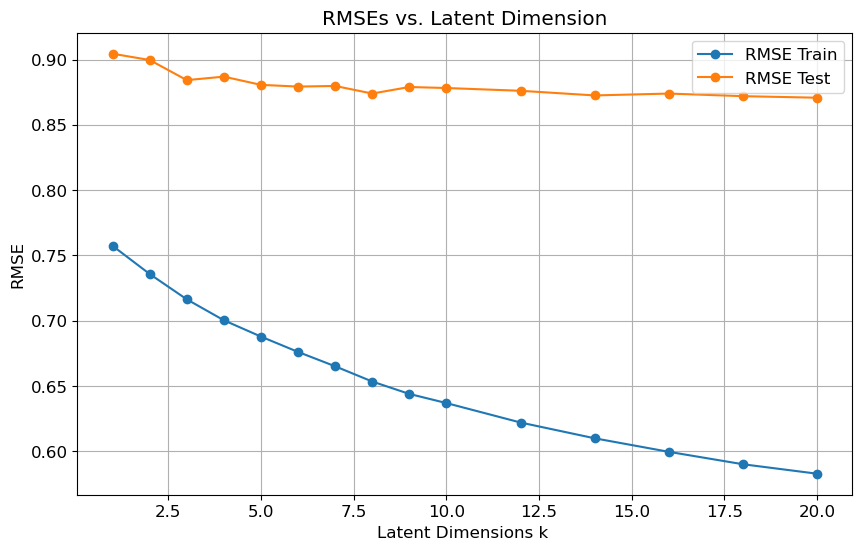

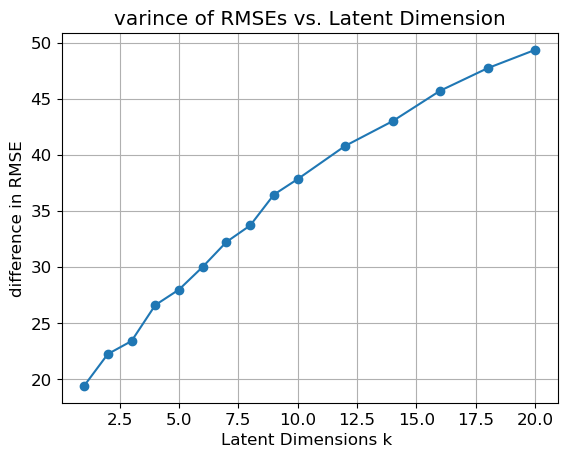

In [26]:

def train_and_plot_rmse_vs_latent_d(data, max_latent_d=20, show_plot=True):
    rmse_train_list = []
    rmse_test_list = []
    latent_d_values = [] 
    percentage_diff = [] # x-axis values
    
    for latent_d in range(1 , max_latent_d + 1):
        if latent_d <= 10 or latent_d % 2 == 0:
            print(f"Training with latent_d = {latent_d}")
            model = Trainor(data, latent_d=latent_d)
            model.train(epoch=10, showplt = False)
            r = model.rmse[-1]  # Get the last RMSE from the training
            rt = model.rmse_test[-1]
            var =  100*(rt - r)/r
            percentage_diff.append(var)
            rmse_train_list.append(r) 
            rmse_test_list.append(rt)  
            latent_d_values.append(latent_d)  
    
    # Plots 
    plt.figure(figsize=(10, 6))
    plt.plot(latent_d_values, rmse_train_list, label='RMSE Train', marker='o')
    plt.plot(latent_d_values, rmse_test_list, label='RMSE Test', marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('RMSE')
    plt.title('RMSEs vs. Latent Dimension')
    plt.legend()
    plt.grid()
    
  
    plt.savefig('rmse_vs_latent_d.svg')
    plt.show()
    
    plt.plot(latent_d_values, percentage_diff, marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('difference in RMSE')
    plt.title('varince of RMSEs vs. Latent Dimension')
    plt.grid()
    plt.savefig('latent dimesions k.svg')
    plt.show()


train_and_plot_rmse_vs_latent_d(train_test_data,max_latent_d=20, show_plot=False)  



In [ ]:
trainor.predictor(features_data[0], train_test_data[0] , 1)

In [ ]:
 #pickle and load
data_trained_data = trainor.user_matrix , trainor.item_matrix ,trainor.user_bias ,trainor.item_bias 
with open( "25M_data_trained_data.pkl", "wb") as f:
    pickle.dump(data_trained_data , f)



In [ ]:
# load
with open("25M_data_trained_data.pkl", "rb") as f:
    loaded_data_trained_data = pickle.load(f)

In [ ]:
user_matrix, item_matrix, user_bias, item_bias = loaded_data_trained_data

# **Make predictions**



In [ ]:
def predictor_dummy(user_data_train, mov_title_dict, u_matrix, v_matrix , mov_biases, weight = 0, user_indx = 0):

    #predictions for user
    
    r_pred = [round(r, 5) for r in (np.inner(v_matrix[user_trainorindx], v_matrix) + weight*mov_biases) ] 
    indexed_r = [ (m_idx, r) for m_idx,r in enumerate(r_pred)] #index predictions
    
    # remove watched movies by user
    watched_movies = [t[0] for t in user_data_train[user_indx]] #mindx

    #delete them from list
    unwatched = [ indexed_r[i] for i in range(len(indexed_r)) if i not in watched_movies]
    
    #sort and recommend
    recommend  = sorted(unwatched, key=lambda x: x[1], reverse=True)

    print("AI recommnds:........ ")
    for i , movie in enumerate(recommend[:10]):
        print( "\t", i+1, mov_title_dict[movie[0]], flush=True)
        time.sleep(0.5)
 

In [ ]:

def predictor(user_data_train, mov_title_dict, u_matrix, v_matrix , mov_biases, weight = 0, user_indx = 0):

    #predictions for user
    
    r_pred = [round(r, 5) for r in (np.inner(u_matrix[user_indx], v_matrix) + weight*mov_biases) ] 
    indexed_r = [ (m_idx, r) for m_idx,r in enumerate(r_pred)] #index predictions
    
    # dont recoommedn watched movies by user
    watched_movies = [t[0] for t in user_data_train[user_indx]] #mindx
    unwatched = [ indexed_r[i] for i in range(len(indexed_r)) if i not in watched_movies]  #delete them from list
    
    #sort and recommend
    recommend  = sorted(unwatched, key=lambda x: x[1], reverse=True)

    print("AI recommnds:........ ")
    for i , movie in enumerate(recommend[:10]):
        print( "\t", i+1, mov_title_dict[movie[0]], flush=True)
        time.sleep(0.5)
 

In [ ]:
predictor( train_test_data[0], movie_to_system_mov_title_dict, user_matrix, item_matrix, item_bias, weight = 0, user_indx = 1 )

In [ ]:
def k_variance(train_test_data, k_max = 20, epochs = 10):
    
    k_values = []
    percentage_diff_rmse = []
    rmse_tst = []
    rmse_trn = []
    model = Trainor(data = train_test_data, gamma=0.01)
    for k in range( k_max + 1):
        model.rmse = []
        model.rmse_test = []
        model.latent_d = k
        model.train()
        rmse_tst.append(model.rmse_test[-1])
        rmse_trn.append(model.rmse_train[-1])
        # Calculate RMSE percentage difference between test and training
        percentage_diff = ((rmse_test[-1] -rmse_train[-1]) / rmse_train[-1]) * 100
        k_values.append(k)
        percentage_diff_rmse.append(percentage_diff)
        
        print(f"Iteration {k}: k={k}, Percentage Diff RMSE={percentage_diff:.1f}%")

    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, percentage_diff_rmse, marker='o', linestyle='-')

    plt.xlabel('Dimesnions k')
    plt.ylabel('Percentage diffwhat is tuple in pythong', bbox_inches="tight")
    plt.show()


     # Create a plot
    plt.figure()
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, rmse_tst, marker='o', linestyle='-', label = "test RMSE")
    plt.plot(k_values, rmse_trn, marker='o', linestyle='--', label = "train RMSE")


    plt.xlabel('dimesions k')
    plt.ylabel("RMSE's ")
    plt.title('RMSE test and train vs latent factors k')
    plt.grid(True)
    plt.legend(loc="upper left", fontsize=12)
    plt.savefig('latent_vecs_t+T.svg', bbox_inches="tight")
    plt.show()


    return k_values, percentage_diff_rmse


In [ ]:
k_variance(train_test_data=train_test_data, k_max = 20, epochs = 10)

  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (5,5) (0,0) (5,5) 

In [ ]:
#user who rated superman movie 5*
userIndx = sparse.system_user_to_user_dict[186]

predictor( train_test_data[0] , features_data[0], data[0], data[1] , data[3], user_indx = 100 ) 

In [ ]:

# mov_to_system_mov_title_dict
fig, ax = plt.subplots(figsize=(10,6))
for feature_index, mids in enumerate(feature_movie):
    if len(mids) >= 3:  # Chelatent_dck the length of mids
        # Randomly pick 3 movies from feature
        random_movies = np.random.choice(mids, 2, replace=False).tolist()
        for movie in random_movies:
            # Annotate with small text size
            plt.scatter(vn[movie, 0], vn[movie, 1], alpha=0.5)
            mov_to_system_mov_title_dict[movie]
            # plt.annotate(mov_to_system_mov_title_dict[movie], (vn[movie, 0], vn[movie, 1]), fontsize = 6)

            # Set axis limits to include negative values
plt.autoscale() 
plt.legend(y, loc="upper right")
plt.show()
